## Miles Benjamin CS 6140 Homework 1

Just start at the top and start running in order.  If you want to go back start at the beginning of the section to make sure that the variables are initialized properly.  Hope this works well for you!

In [1]:
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io as scio

%matplotlib inline 

Importing all the libraries

# 10 part 1

going to start by generating a dataset for which I know an approximate regression

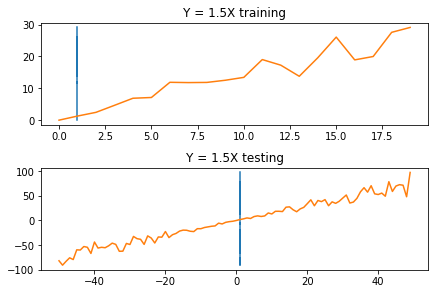

In [2]:

X_trn = []
for i in range(20):
    X_trn.append([1,i])

    
    # Making a data set of approx  y = 1.5x to test the algorithm
sp.random.seed(123)    
Y_trn = []
for i in range(len(X_trn)):
    Y_trn.append(X_trn[i][1] * (sp.rand(1) + 1))

X_tst = []
for i in range(100):
    X_tst.append([1,i - 50])

Y_tst = []
for i in range(len(X_tst)):
    Y_tst.append(X_tst[i][1] * (sp.rand(1) + 1))

    
plt.subplot(2,1,1)
plt.title('Y = 1.5X training')
plt.plot(X_trn, Y_trn)

plt.subplot(2,1,2)
plt.title('Y = 1.5X testing')
plt.plot(X_tst, Y_tst)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [3]:
def calcCFTheta(X,Y):
    inver = np.dot(X.T, X)
    xy = np.dot(X.T, Y)
    theta = np.dot(np.linalg.inv(inver), xy)
    
    
    return theta

In [4]:
def computeCost(X, Y, theta):
    
    cost = np.power(np.linalg.norm((X*theta - Y), 2))
    #print("cost: ", cost)
    return cost
    
    

In [5]:
def gradientDescent(X, Y, theta, lrnRate, ittr, batch):
    #print(X, Y, theta, lrnRate)
    m = len(Y)

    
    for i in range(ittr):
        miniX = []
        miniY = []
        for j in range(batch):
            batchIdx = math.floor((sp.rand(1) * m)[0])
            
            miniX.append(X.A[batchIdx])
            miniY.append(Y.A[batchIdx])
    
        miniX = np.mat(miniX)
        miniY = np.mat(miniY)
        
        
        theta = theta - (lrnRate/m) * (miniX.T * (miniX * theta - miniY))
        #print(theta)
    
    return theta

In [6]:
def outputRegression(theta1, theta2, X_tst, Y_tst, n):    
    print('GD Theta: ', theta1, '\n CF Theta: ', theta2)
    
    plt.figure(figsize=(12, 3*n))
    
    for i in range(n):
        if (i != 0):
            # Get the right X feature column
            c = (i-1) *4
            
            X_test_Col = np.mat([np.array(X_tst)[:, i]])
            X_test_Col = X_test_Col.T
            
        
            # Plot Stochastic Gradient Descent
            plt.subplot(n,4,c+1)
            title = 'LG w/ SGD ', i
            plt.title(title)
            plt.plot(X_test_Col, X_test_Col * theta1[i], linewidth = 2)
            plt.plot(X_test_Col, Y_tst, '.')
 
            # Plot error for SGD
            plt.subplot(n,4,c+2)
            title = 'LG w/ SGD Error ', i
            plt.title(title)
            plt.plot(X_test_Col, abs(Y_tst - (X_test_Col * theta1[i])), '*')
            
            # Plot Closed Form Solution
            plt.subplot(n,4,c+3)
            title = 'LG w/ CFS ', i
            plt.title(title)
            plt.plot(X_test_Col, X_test_Col * theta2[i], linewidth = 2)
            plt.plot(X_test_Col, Y_tst, '.')
    
            # Plot CFS Error
            plt.subplot(n,4,c+4)
            title = 'LG w/ CFS Error ', i
            plt.title(title)
            plt.plot(X_test_Col, abs(Y_tst - (X_test_Col * theta2[i])), '*')

            plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [7]:
def linRegress(X_trn, Y_trn, X_tst, Y_tst, ittr, lrnRate, batch, n):
    m = len(X_trn)  # number of training samples (should be 20)

    X = np.mat(X_trn)
    Y = np.mat(Y_trn)
    theta1 = [0] * n
    
    theta1 = np.mat(theta1).T
    
    theta1 = gradientDescent(X, Y, theta1, lrnRate, ittr, batch)
    theta2 = calcCFTheta(X,Y)
    outputRegression(theta1, theta2, X_tst, Y_tst, n)


In [8]:
def nFeatureizeData(X, n):
    X_out = []

    for i in range(len(X)):
        temp = []
        for j in range(n + 1):
            temp.append(np.power(X[i][0],j))
        
        X_out.append(temp)
    
    
    return X_out;

GD Theta:  [[ 0.45236905]
 [ 1.39636171]] 
 CF Theta:  [[ 0.65462812]
 [ 1.37924891]]


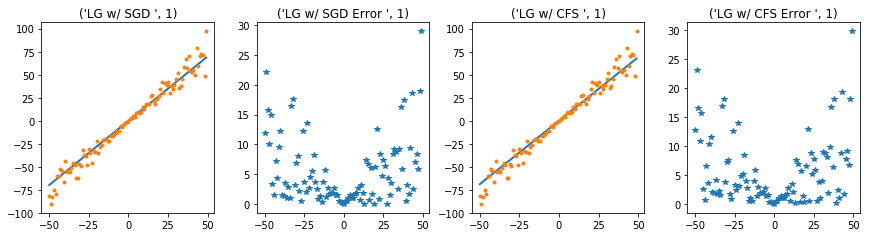

In [9]:
batch = 4     
ittr = 2000
lrnRate = 0.01
n = 2
linRegress(X_trn, Y_trn, X_tst, Y_tst, ittr, lrnRate, batch, n)

# 10 part 2

In [10]:
mat = scio.loadmat('HW1_Data/dataset1.mat')

X_trn = mat['X_trn']
Y_trn = mat['Y_trn']
X_tst = mat['X_tst']
Y_tst = mat['Y_tst']
data = [X_trn,Y_trn,X_tst,Y_tst]

In [11]:
print('shape of the X data is [%d, %d]' % X_trn.shape)
print('shape of the Y data is [%d, %d]' % Y_trn.shape)

shape of the X data is [120, 1]
shape of the Y data is [120, 1]


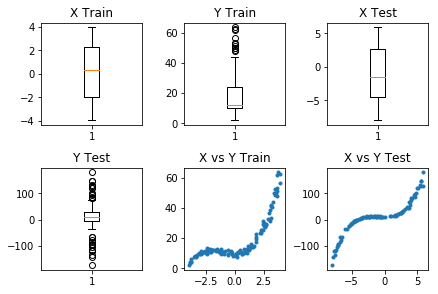

In [12]:
data_labels = ['X Train', 'Y Train', 'X Test', 'Y Test']

for x in range(4):
    plt.subplot(2,3,x +1)
    plt.boxplot(data[x])
    plt.title(data_labels[x])

plt.subplot(2,3,5)
plt.plot(X_trn, Y_trn, '.')
plt.title("X vs Y Train")

plt.subplot(2,3,6)
plt.plot(X_tst, Y_tst, '.')
plt.title("X vs Y Test")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## N = 1

I know I don't have to do this, but I was curious

GD Theta:  [[ 8.6933179 ]
 [ 4.97292288]] 
 CF Theta:  [[ 17.81209242]
 [  4.8607913 ]]


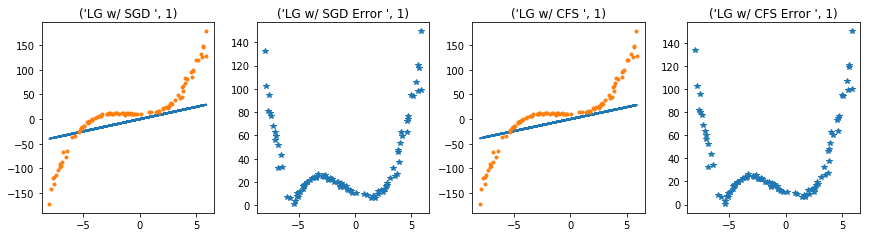

In [13]:
n = 1
batch = 4     
ittr = 2000
lrnRate = 0.01
features = n + 1
linRegress(nFeatureizeData(X_trn, n), Y_trn, nFeatureizeData(X_tst, n), Y_tst, ittr, lrnRate, batch, features)

### For N = 2

GD Theta:  [[ 2.61191853]
 [ 4.72269492]
 [ 2.17740828]] 
 CF Theta:  [[ 9.49203678]
 [ 4.79191663]
 [ 1.52906587]]


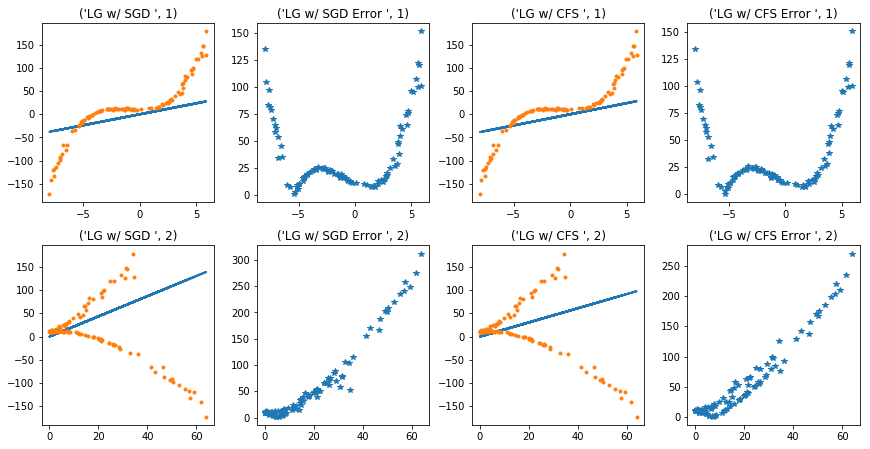

In [14]:
n = 2
batch = 4     
ittr = 2000
lrnRate = 0.01
features = n + 1
linRegress(nFeatureizeData(X_trn, n), Y_trn, nFeatureizeData(X_tst, n), Y_tst, ittr, lrnRate, batch, features)

## For N = 3

GD Theta:  [[ 2.67293373]
 [ 0.26412971]
 [ 2.19149404]
 [ 0.46508544]] 
 CF Theta:  [[ 10.00815033]
 [  0.20418927]
 [  1.47413164]
 [  0.47320168]]


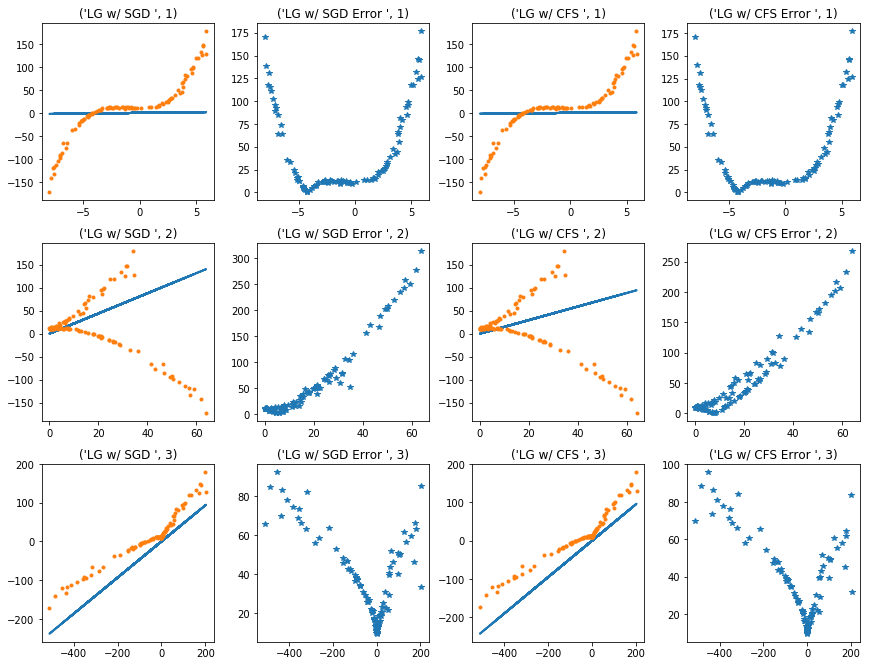

In [15]:
n = 3
batch = 4     
ittr = 2000
lrnRate = 0.01
features = n + 1
linRegress(nFeatureizeData(X_trn, n), Y_trn, nFeatureizeData(X_tst, n), Y_tst, ittr, lrnRate, batch, features)

## For N = 5
 
 

GD Theta:  [[  4.85328498e-01]
 [  1.35269865e-01]
 [  1.05553575e+00]
 [  4.21730646e-01]
 [  1.02181622e-01]
 [ -1.24677512e-04]] 
 CF Theta:  [[  9.84545670e+00]
 [  2.03644970e-01]
 [  1.57564738e+00]
 [  4.75176601e-01]
 [ -7.40094164e-03]
 [ -1.77139419e-04]]


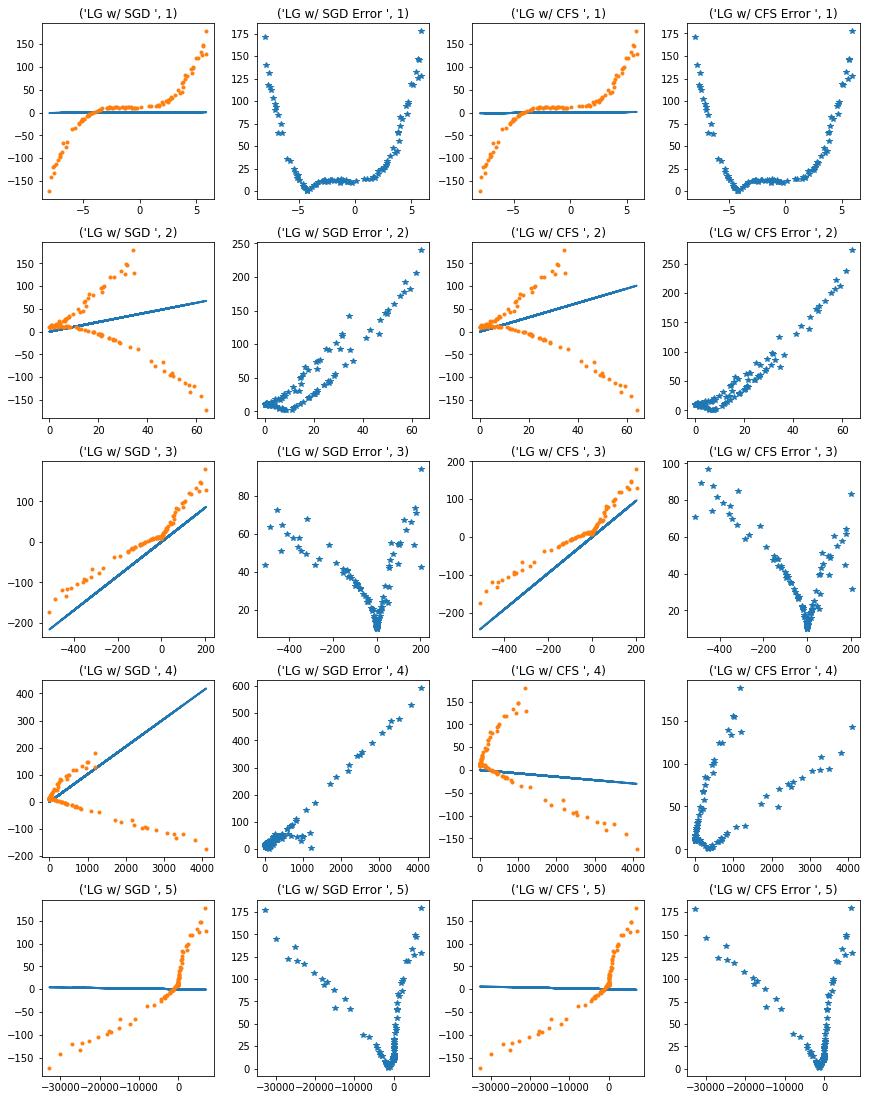

In [148]:
n = 5
batch = 4    
ittr = 20000
lrnRate = 0.0001
features = n + 1
linRegress(nFeatureizeData(X_trn, n), Y_trn, nFeatureizeData(X_tst, n), Y_tst, ittr, lrnRate, batch, features)

# I had to really tone down the learning rate and turn up the itterations to avoid massive overfitting on this one.
# it appears that there is a direct correlation between the size of n and the time required as well as the error


# 10.3

In [149]:
mat = scio.loadmat('HW1_Data/dataset2.mat')

X_trn = mat['X_trn']
Y_trn = mat['Y_trn']
X_tst = mat['X_tst']
Y_tst = mat['Y_tst']
data = [X_trn,Y_trn,X_tst,Y_tst]

In [150]:
print('shape of the X data is [%d, %d]' % X_trn.shape)
print('shape of the Y data is [%d, %d]' % Y_trn.shape)

shape of the X data is [100, 1]
shape of the Y data is [100, 1]


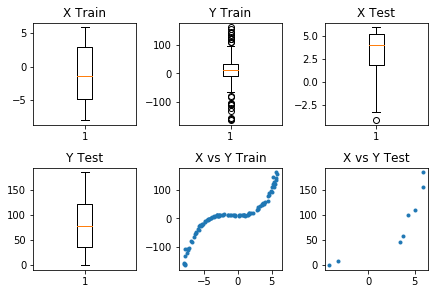

In [157]:
data_labels = ['X Train', 'Y Train', 'X Test', 'Y Test']

for x in range(4):
    plt.subplot(2,3,x +1)
    plt.boxplot(data[x])
    plt.title(data_labels[x])

plt.subplot(2,3,5)
plt.plot(X_trn, Y_trn, '.')
plt.title("X vs Y Train")

plt.subplot(2,3,6)
plt.plot(X_tst, Y_tst, '.')
plt.title("X vs Y Test")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [208]:
def calcCFRidge(X,Y,lam):
    #print(lam, X, Y)
    inver = np.dot(X.T, X) + (lam * np.identity(len(X[0])))
    xy = np.dot(X.T, Y)
    theta = np.dot(np.linalg.inv(inver), xy)
    
    return theta

In [292]:
def kCrossValid(X,Y,lams,c):
    # I just did K=N cross validation.  I didn't have time to generalize this function.
    
    thetas = []
    holdOuts = []
    
    for i in range(len(lams)):
        X_test = []
        Y_test = []
        for j in range(len(X)):
            if (j != i):
                X_test.append(X[j])
                Y_test.append(Y[j])
        X_test = np.mat(X_test)
        Y_test = np.mat(Y_test)
        if (c == 1):
            thetas.append(calcCFRidge(X_test,Y_test,lams[i]))
        if (c == 0):
            dummytheta = [0] * len(X[0])
            dummytheta = np.mat(dummytheta).T
            #print(dummytheta)
            thetas.append(gradDescentRidge(X_test,Y_test,dummytheta, 0.0001,lams[i][0], 2000, 4))
        
        holdOuts.append(abs(Y[i] - X[i]*thetas[i]))
    holdOuts = np.asarray(holdOuts)
    #print(np.argmin(holdOuts))
     
    
    return lams[np.argmin(holdOuts)]   

In [293]:
def gradDescentRidge(X, Y, theta, lrnRate, lams, ittr, batch):
    #print(X, Y, theta, lrnRate)
    m = len(Y)

    
    for i in range(ittr):
        miniX = []
        miniY = []
        for j in range(batch):
            batchIdx = math.floor((sp.rand(1) * m)[0])
            
            miniX.append(X.A[batchIdx])
            miniY.append(Y.A[batchIdx])
    
        miniX = np.mat(miniX)
        miniY = np.mat(miniY)
        
        #print("\ntheta: ", theta, "\nminiX: ", miniX, "\nminiY: ", miniY, "\nLams:", lams)
        theta = theta - (lrnRate/m) * ((miniX.T * (miniX * theta - miniY)) + (lams * theta))
        
    
    return theta
    
    

Stocastic Grad Descent
lambda:  42.6351306963  theta:  [[-2.83651949]
 [ 9.07501993]
 [ 3.07809323]]
Closed Form Solution
lambda:  1.6129206695  theta:  [[-12.76880157]
 [  8.932615  ]
 [  3.55154316]]
GD Theta:  [[-2.83651949]
 [ 9.07501993]
 [ 3.07809323]] 
 CF Theta:  [[-12.76880157]
 [  8.932615  ]
 [  3.55154316]]


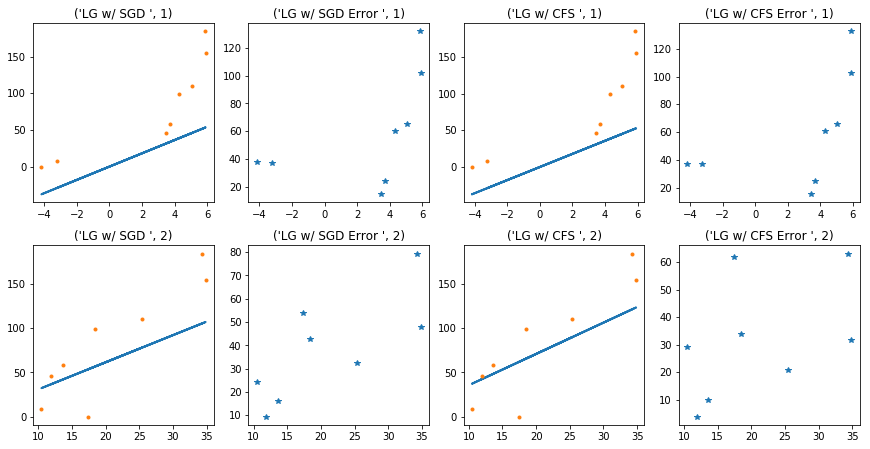

In [297]:
N = [2]

for k in range(len(N)):
    
    X_temp = nFeatureizeData(X_trn, N[k])

    sp.random.seed(123) 
    lams = []
    for i in range(len(X_temp)):
        lams.append(sp.rand(1) * 10)


    lam2 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 1)[0]
    lam1 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 0)[0]


    X = nFeatureizeData(X_tst, N[k])
    
    theta1 = [0] * (N[k] +1)
    
    theta1 = np.mat(theta1).T

    theta1 = gradDescentRidge(np.mat(X), np.mat(Y_tst), np.mat(theta1), 0.001, lam2, 2000, 4)
    print("Stocastic Grad Descent")
    print("lambda: ", lam1, " theta: ", theta1)
    
    theta2 = calcCFRidge(np.mat(X), np.mat(Y_tst), lam1)
    print("Closed Form Solution")
    print("lambda: ", lam2, " theta: ", theta2)
 

    outputRegression(theta1, theta2, X, Y_tst, N[k] + 1)


Stocastic Grad Descent
lambda:  5.94431879445  theta:  [[ 0.23262323]
 [ 0.48047131]
 [ 2.18935039]
 [ 0.41686872]]
Closed Form Solution
lambda:  2.8613933495  theta:  [[-5.53988052]
 [ 3.36237553]
 [ 2.67880489]
 [ 0.31145214]]
GD Theta:  [[ 0.23262323]
 [ 0.48047131]
 [ 2.18935039]
 [ 0.41686872]] 
 CF Theta:  [[-5.53988052]
 [ 3.36237553]
 [ 2.67880489]
 [ 0.31145214]]


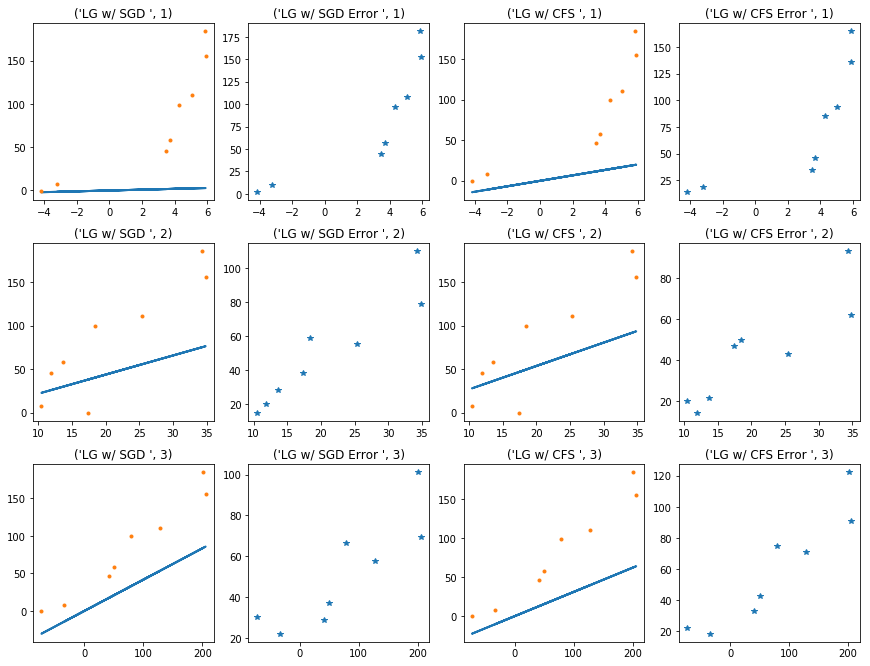

In [295]:
N = [3]

for k in range(len(N)):
    
    X_temp = nFeatureizeData(X_trn, N[k])

    sp.random.seed(123) 
    lams = []
    for i in range(len(X_temp)):
        lams.append(sp.rand(1) * 10)


    lam2 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 1)[0]
    lam1 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 0)[0]


    X = nFeatureizeData(X_tst, N[k])
    
    theta1 = [0] * (N[k] +1)
    
    theta1 = np.mat(theta1).T

    theta1 = gradDescentRidge(np.mat(X), np.mat(Y_tst), np.mat(theta1), 0.0001, lam2, 2000, 4)
    print("Stocastic Grad Descent")
    print("lambda: ", lam1, " theta: ", theta1)
    
    theta2 = calcCFRidge(np.mat(X), np.mat(Y_tst), lam1)
    print("Closed Form Solution")
    print("lambda: ", lam2, " theta: ", theta2)
 

    outputRegression(theta1, theta2, X, Y_tst, N[k] + 1)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


Stocastic Grad Descent
lambda:  6.96469185598  theta:  [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]]
Closed Form Solution
lambda:  0.957125166124  theta:  [[ -2.69428026e+00]
 [ -1.17375436e+00]
 [  3.16040989e+00]
 [  6.60069335e-01]
 [ -4.10876507e-02]
 [ -2.32212241e-03]]
GD Theta:  [[ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [ nan]] 
 CF Theta:  [[ -2.69428026e+00]
 [ -1.17375436e+00]
 [  3.16040989e+00]
 [  6.60069335e-01]
 [ -4.10876507e-02]
 [ -2.32212241e-03]]


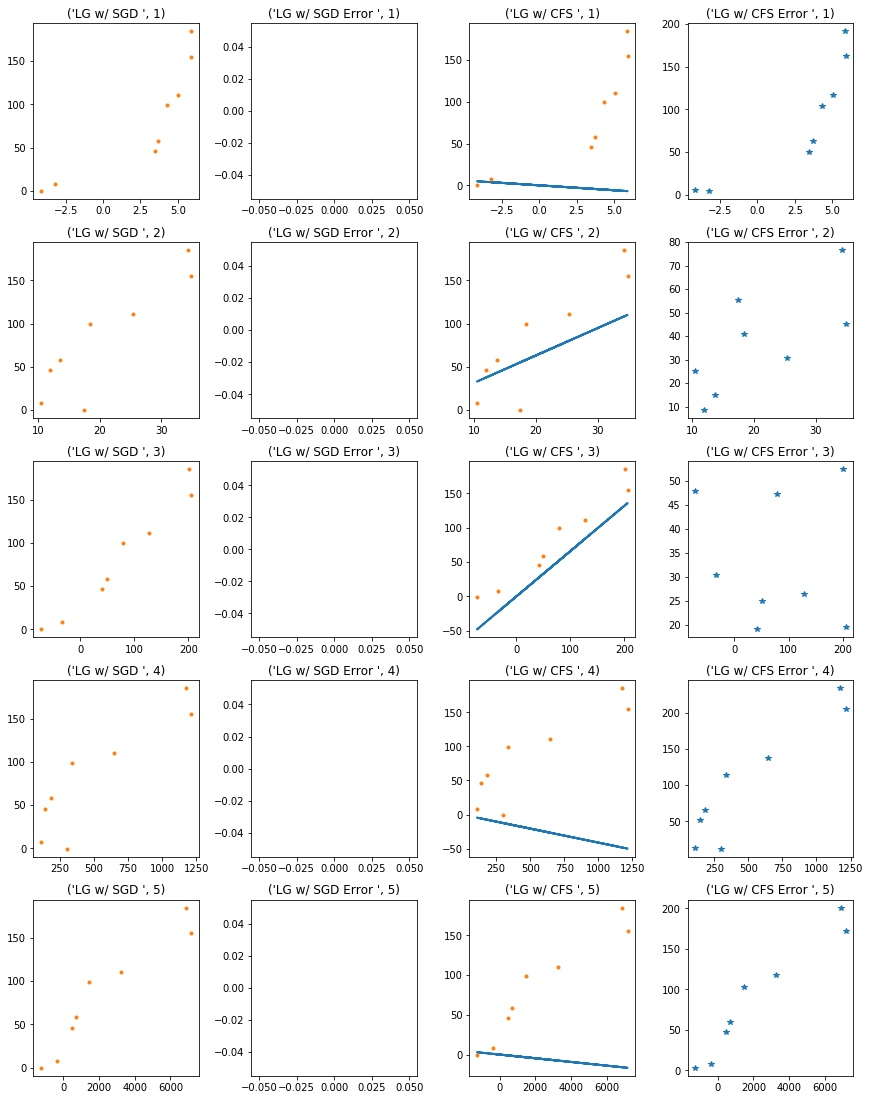

In [296]:
# This one won't run, I think it's too much for the kernel to handle!

N = [5]

for k in range(len(N)):
    
    X_temp = nFeatureizeData(X_trn, N[k])

    sp.random.seed(123) 
    lams = []
    for i in range(len(X_temp)):
        lams.append(sp.rand(1) * 10)


    lam2 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 1)[0]
    lam1 = kCrossValid(X_temp, Y_trn, np.asarray(lams), 0)[0]


    X = nFeatureizeData(X_tst, N[k])
    
    theta1 = [0] * (N[k] +1)
    
    theta1 = np.mat(theta1).T

    theta1 = gradDescentRidge(np.mat(X), np.mat(Y_tst), np.mat(theta1), 0.0001, lam2, 2000, 4)
    print("Stocastic Grad Descent")
    print("lambda: ", lam1, " theta: ", theta1)
    
    theta2 = calcCFRidge(np.mat(X), np.mat(Y_tst), lam1)
    print("Closed Form Solution")
    print("lambda: ", lam2, " theta: ", theta2)
 

    outputRegression(theta1, theta2, X, Y_tst, N[k] + 1)
